# Feature Engineering and Feature Selection

## Feature Engineering

## Feature Selection

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")
%matplotlib inline

### Importing Data

In [2]:
train_data = pd.read_csv('Arya_DataScientist_Assignment/training_set.csv')
test_data = pd.read_csv('Arya_DataScientist_Assignment/test_set.csv')

In [3]:
train_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [4]:
test_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [5]:
train_data.drop(train_data.columns[train_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_data.drop(test_data.columns[test_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [6]:
train = train_data.drop(['Y'], axis=1).copy()

### Finding Correlation between features

<AxesSubplot:>

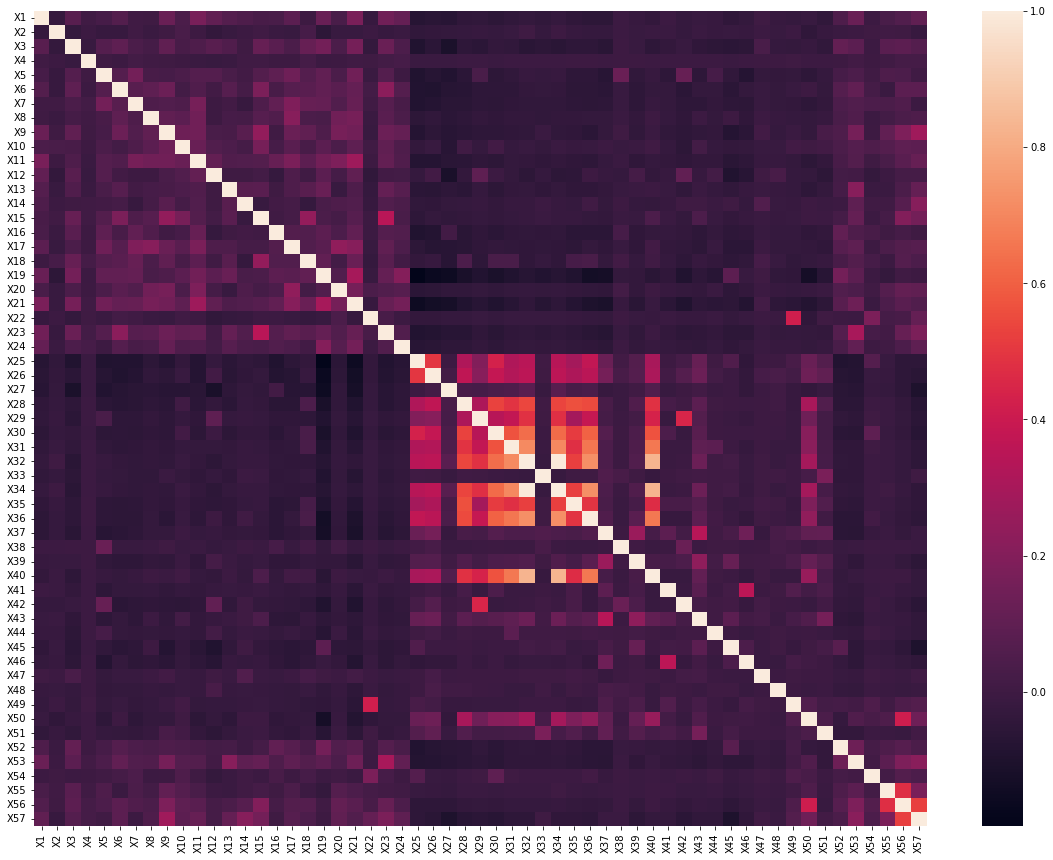

In [7]:
fig, ax = plt.subplots(figsize=(20,15))
correlations = train.corr()
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns)

In [8]:
correlations.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
X1,1.000000,-0.026677,0.078010,0.007472,0.025377,0.060360,0.004934,0.002262,0.128300,0.038547,...,-0.023943,-0.026043,-0.019084,-0.042516,0.049536,0.128384,-0.009324,0.032279,0.056025,0.101600
X2,-0.026677,1.000000,-0.030758,-0.006455,-0.020289,-0.023827,0.006748,-0.014461,0.000199,0.035494,...,-0.015188,-0.006349,-0.045741,-0.021728,-0.014497,-0.008293,0.001034,0.004376,0.001448,-0.021016
X3,0.078010,-0.030758,1.000000,-0.018648,0.065148,0.093120,0.037979,0.018314,0.098008,0.029760,...,-0.028276,-0.031217,-0.019428,-0.039784,0.109943,0.084654,-0.007824,0.080559,0.091124,0.067387
X4,0.007472,-0.006455,-0.018648,1.000000,0.001837,-0.008594,0.015680,0.004700,0.000138,-0.002183,...,-0.001247,0.001048,-0.009132,-0.008458,-0.002776,0.008798,-0.001704,0.004715,0.020733,0.021542
X5,0.025377,-0.020289,0.065148,0.001837,1.000000,0.065459,0.157810,0.030440,0.023903,0.038379,...,-0.033886,-0.030872,-0.050698,-0.026512,0.025764,0.042036,0.004088,0.048949,0.045998,0.004402


In [9]:
corr_matrix = np.array(correlations)
corr_matrix.shape

(57, 57)

In [11]:
def correlations_filter(matrix, threshold):
    feature_dict = {}
    for index_1 in range(matrix.shape[0]):
        current_list = []
        for index_2 in range(matrix.shape[0]):
            if matrix[index_1][index_2] >= abs(threshold) and index_1 != index_2:
                key =  "X"+ str(index_2 + 1)
                value = matrix[index_1][index_2]
                current_list.append({key:value})
        if len(current_list) != 0:
            feature_dict["Feature X"+str(index_1 + 1)] = current_list
    return feature_dict
    

In [12]:
#### printing out features having correlation more than 10% between them
correlations_filter(corr_matrix, 0.10)

{'Feature X1': [{'X9': 0.12830020470517672},
  {'X11': 0.17167812223887444},
  {'X12': 0.10475143147950064},
  {'X19': 0.12335686665564154},
  {'X21': 0.1734189358905391},
  {'X23': 0.1442902277324651},
  {'X24': 0.11385186541332838},
  {'X53': 0.1283841444683595},
  {'X57': 0.10159965580256908}],
 'Feature X3': [{'X15': 0.11902060247119675},
  {'X18': 0.11898021330123737},
  {'X19': 0.15552258526278367},
  {'X21': 0.15869370394838236},
  {'X23': 0.12931660275556803},
  {'X52': 0.10994317361324361}],
 'Feature X5': [{'X7': 0.15781021665241385},
  {'X17': 0.14281444249024394},
  {'X19': 0.1040450105529017},
  {'X21': 0.1446739135374014},
  {'X38': 0.12639171470385888},
  {'X42': 0.1167843052557606}],
 'Feature X6': [{'X9': 0.1326235666884004},
  {'X15': 0.1780765618879182},
  {'X19': 0.10247557086931895},
  {'X21': 0.11594495734645807},
  {'X23': 0.22208321814963713},
  {'X53': 0.1049058486574147}],
 'Feature X7': [{'X5': 0.15781021665241385},
  {'X11': 0.16541058314341542},
  {'X16': 0

In [13]:
#### printing out features having correlation more than 20% between them
correlations_filter(corr_matrix, 0.20)

{'Feature X6': [{'X23': 0.22208321814963713}],
 'Feature X8': [{'X17': 0.2132653640102928}],
 'Feature X9': [{'X15': 0.23834588447382338}, {'X57': 0.2767665304396746}],
 'Feature X11': [{'X21': 0.2734423822614194}],
 'Feature X13': [{'X53': 0.2120016753932874}],
 'Feature X14': [{'X57': 0.2064604108281164}],
 'Feature X15': [{'X9': 0.23834588447382338},
  {'X18': 0.24341806744438538},
  {'X23': 0.34571472683750143}],
 'Feature X17': [{'X8': 0.2132653640102928},
  {'X20': 0.2353226643811587},
  {'X21': 0.20959032573937683}],
 'Feature X18': [{'X15': 0.24341806744438538}],
 'Feature X19': [{'X21': 0.29598200894787585}, {'X24': 0.20209885697698074}],
 'Feature X20': [{'X17': 0.2353226643811587}],
 'Feature X21': [{'X11': 0.2734423822614194},
  {'X17': 0.20959032573937683},
  {'X19': 0.29598200894787585}],
 'Feature X22': [{'X49': 0.41551507837746793}],
 'Feature X23': [{'X6': 0.22208321814963713},
  {'X15': 0.34571472683750143},
  {'X53': 0.3012787167260175}],
 'Feature X24': [{'X19': 0.2

In [14]:
#### printing out features having correlation more than 30% between them
correlations_filter(corr_matrix, 0.30)

{'Feature X15': [{'X23': 0.34571472683750143}],
 'Feature X22': [{'X49': 0.41551507837746793}],
 'Feature X23': [{'X15': 0.34571472683750143}, {'X53': 0.3012787167260175}],
 'Feature X25': [{'X26': 0.4971487363552804},
  {'X28': 0.31731817170441584},
  {'X30': 0.4326205745390311},
  {'X31': 0.31969826930903},
  {'X32': 0.34632512876975163},
  {'X34': 0.34476963375899006},
  {'X36': 0.3726118378596982},
  {'X40': 0.30315071272458755}],
 'Feature X26': [{'X25': 0.4971487363552804},
  {'X28': 0.3652750097354552},
  {'X30': 0.3801616812756097},
  {'X31': 0.3277692359072288},
  {'X32': 0.35726882615068306},
  {'X34': 0.35609964836027136},
  {'X35': 0.3172070389771715},
  {'X36': 0.35391436535245874},
  {'X40': 0.3114366814182654}],
 'Feature X28': [{'X25': 0.31731817170441584},
  {'X26': 0.3652750097354552},
  {'X29': 0.3136768464663346},
  {'X30': 0.532294454393851},
  {'X31': 0.48866893842591924},
  {'X32': 0.5380591472239712},
  {'X34': 0.5360288332713503},
  {'X35': 0.5613726710714394},

In [15]:
#### printing out features having correlation more than 40% between them.
correlations_filter(corr_matrix, 0.40)

{'Feature X22': [{'X49': 0.41551507837746793}],
 'Feature X25': [{'X26': 0.4971487363552804}, {'X30': 0.4326205745390311}],
 'Feature X26': [{'X25': 0.4971487363552804}],
 'Feature X28': [{'X30': 0.532294454393851},
  {'X31': 0.48866893842591924},
  {'X32': 0.5380591472239712},
  {'X34': 0.5360288332713503},
  {'X35': 0.5613726710714394},
  {'X36': 0.5474957471595343},
  {'X40': 0.48399958845864355}],
 'Feature X29': [{'X32': 0.48151538989001885},
  {'X34': 0.4794794660157049},
  {'X40': 0.43516304429025265},
  {'X42': 0.4449827888078721}],
 'Feature X30': [{'X25': 0.4326205745390311},
  {'X28': 0.532294454393851},
  {'X31': 0.5679289299730754},
  {'X32': 0.6326993425283123},
  {'X34': 0.6299982047325219},
  {'X35': 0.5118749106894072},
  {'X36': 0.6036264589904122},
  {'X40': 0.5681670504983259}],
 'Feature X31': [{'X28': 0.48866893842591924},
  {'X30': 0.5679289299730754},
  {'X32': 0.7060579396900456},
  {'X34': 0.7033229590560067},
  {'X35': 0.4794095423781171},
  {'X36': 0.6583084

In [16]:
#### printing out features having correlation more than 50% between them.
correlations_filter(corr_matrix, 0.50)

{'Feature X28': [{'X30': 0.532294454393851},
  {'X32': 0.5380591472239712},
  {'X34': 0.5360288332713503},
  {'X35': 0.5613726710714394},
  {'X36': 0.5474957471595343}],
 'Feature X30': [{'X28': 0.532294454393851},
  {'X31': 0.5679289299730754},
  {'X32': 0.6326993425283123},
  {'X34': 0.6299982047325219},
  {'X35': 0.5118749106894072},
  {'X36': 0.6036264589904122},
  {'X40': 0.5681670504983259}],
 'Feature X31': [{'X30': 0.5679289299730754},
  {'X32': 0.7060579396900456},
  {'X34': 0.7033229590560067},
  {'X36': 0.6583084836075285},
  {'X40': 0.6631226824832043}],
 'Feature X32': [{'X28': 0.5380591472239712},
  {'X30': 0.6326993425283123},
  {'X31': 0.7060579396900456},
  {'X34': 0.9952405059668877},
  {'X35': 0.5212547366396195},
  {'X36': 0.7235393784954144},
  {'X40': 0.8312446856194268}],
 'Feature X34': [{'X28': 0.5360288332713503},
  {'X30': 0.6299982047325219},
  {'X31': 0.7033229590560067},
  {'X32': 0.9952405059668877},
  {'X35': 0.5192588857628773},
  {'X36': 0.720434649625

In [17]:
#### printing out features having correlation more than 60% between them.
correlations_filter(corr_matrix, 0.60)

{'Feature X30': [{'X32': 0.6326993425283123},
  {'X34': 0.6299982047325219},
  {'X36': 0.6036264589904122}],
 'Feature X31': [{'X32': 0.7060579396900456},
  {'X34': 0.7033229590560067},
  {'X36': 0.6583084836075285},
  {'X40': 0.6631226824832043}],
 'Feature X32': [{'X30': 0.6326993425283123},
  {'X31': 0.7060579396900456},
  {'X34': 0.9952405059668877},
  {'X36': 0.7235393784954144},
  {'X40': 0.8312446856194268}],
 'Feature X34': [{'X30': 0.6299982047325219},
  {'X31': 0.7033229590560067},
  {'X32': 0.9952405059668877},
  {'X36': 0.720434649625819},
  {'X40': 0.8280394143386348}],
 'Feature X36': [{'X30': 0.6036264589904122},
  {'X31': 0.6583084836075285},
  {'X32': 0.7235393784954144},
  {'X34': 0.720434649625819},
  {'X40': 0.6605429535917039}],
 'Feature X40': [{'X31': 0.6631226824832043},
  {'X32': 0.8312446856194268},
  {'X34': 0.8280394143386348},
  {'X36': 0.6605429535917039}]}

In [18]:
#### printing out features having correlation more than 70% between them.
correlations_filter(corr_matrix, 0.70)

{'Feature X31': [{'X32': 0.7060579396900456}, {'X34': 0.7033229590560067}],
 'Feature X32': [{'X31': 0.7060579396900456},
  {'X34': 0.9952405059668877},
  {'X36': 0.7235393784954144},
  {'X40': 0.8312446856194268}],
 'Feature X34': [{'X31': 0.7033229590560067},
  {'X32': 0.9952405059668877},
  {'X36': 0.720434649625819},
  {'X40': 0.8280394143386348}],
 'Feature X36': [{'X32': 0.7235393784954144}, {'X34': 0.720434649625819}],
 'Feature X40': [{'X32': 0.8312446856194268}, {'X34': 0.8280394143386348}]}

In [19]:
#### printing out features having correlation more than 80% between them.
correlations_filter(corr_matrix, 0.80)

{'Feature X32': [{'X34': 0.9952405059668877}, {'X40': 0.8312446856194268}],
 'Feature X34': [{'X32': 0.9952405059668877}, {'X40': 0.8280394143386348}],
 'Feature X40': [{'X32': 0.8312446856194268}, {'X34': 0.8280394143386348}]}

In [20]:
#### printing out features having correlation more than 90% between them.
correlations_filter(corr_matrix, 0.90)

{'Feature X32': [{'X34': 0.9952405059668877}],
 'Feature X34': [{'X32': 0.9952405059668877}]}

### Now it's time to drop those features which are highly correlated, we will take a correlation criteria of 85% threshold limit. 

In [21]:
correlations_filter(corr_matrix, 0.85)

{'Feature X32': [{'X34': 0.9952405059668877}],
 'Feature X34': [{'X32': 0.9952405059668877}]}

### When we set threshold limit as 85%, we got X32 and X34 as highly correlated features. So let's drop any one of it.

In [22]:
train.drop(["X32"], axis=1, inplace=True)
test_data.drop(["X32"], axis=1, inplace=True)

In [23]:
train.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42',
       'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52',
       'X53', 'X54', 'X55', 'X56', 'X57'],
      dtype='object')

In [24]:
test_data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42',
       'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52',
       'X53', 'X54', 'X55', 'X56', 'X57'],
      dtype='object')